In [17]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, stft
from python_speech_features import mfcc
from scipy.signal import spectrogram, wiener

# Step 1: Read the CSV file
data = pd.read_csv("csv_data/AHI11.2_128Hz.csv")

fs = 128  # Sampling frequency

# Step 2: Preprocess the data into 30-second windows
window_size = 30 * fs  # 30 seconds * 128 Hz
windows = [data[i : i + window_size] for i in range(0, len(data), window_size)]

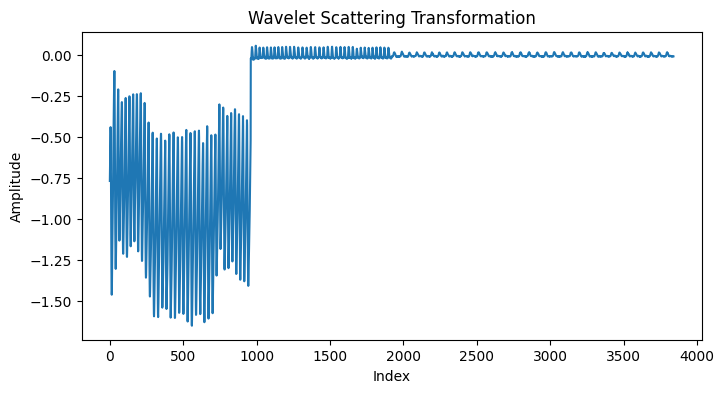

In [8]:
# Step 3: Apply 1-D wavelet scattering transformation
def apply_wavelet_transformation(window):
    coeffs = pywt.wavedec(
        window["values"], "db1", level=2
    )  # You can choose a different wavelet and level
    return np.concatenate(coeffs)


transformed_windows_wavelet = [
    apply_wavelet_transformation(window) for window in windows
]

# Step 4: Visualize the transformed data
plt.figure(figsize=(8, 4))
plt.plot(transformed_windows_wavelet[int(len(transformed_windows_wavelet) / 2)])
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.title("Wavelet Scattering Transformation")
plt.show()

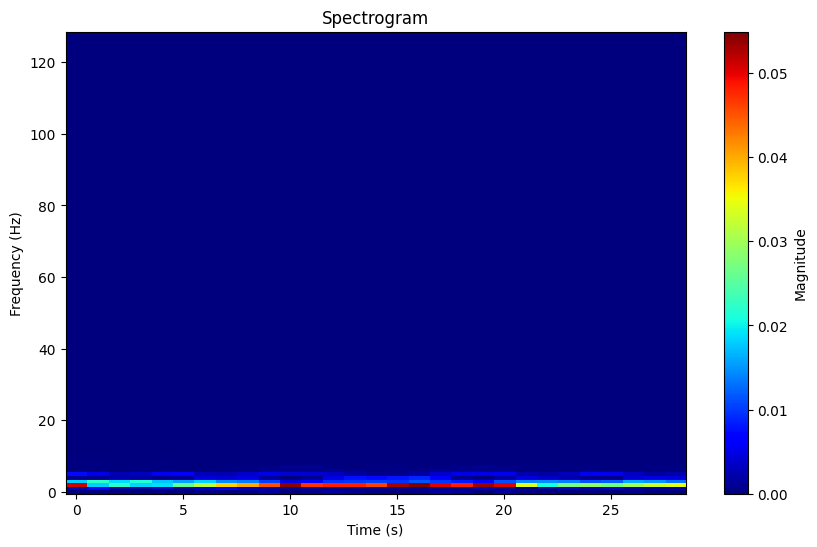

In [10]:
# Step 5: Generate spectrogram
def apply_spectrogram(window):
    f, t, Sxx = spectrogram(
        window["values"], fs=128, nperseg=256, noverlap=128, nfft=256
    )
    return Sxx


spectrograms = [apply_spectrogram(window) for window in windows]

# Visualize spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(spectrograms[int(len(spectrograms)/2)], aspect="auto", cmap="jet", origin="lower")
plt.colorbar(label="Magnitude")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram")
plt.show()

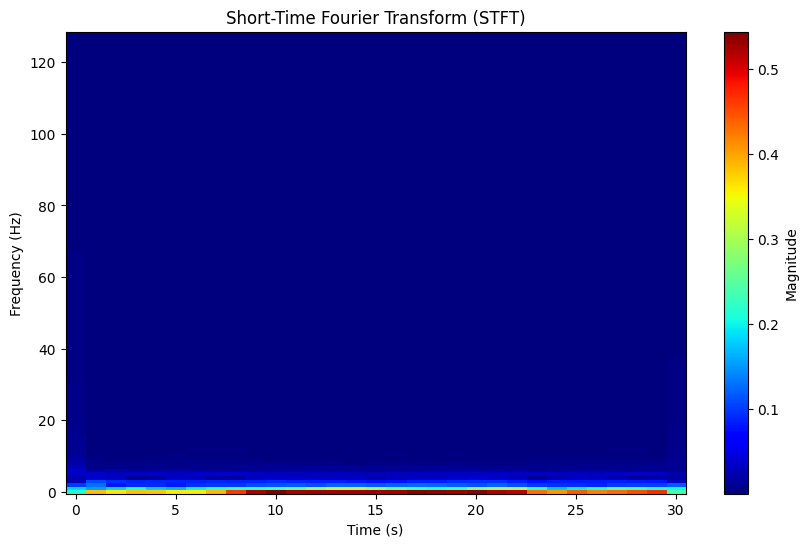

In [11]:
# Step 6: Compute Short-Time Fourier Transform (STFT)
def apply_stft(window):
    f, t, Zxx = stft(window["values"], fs=128, nperseg=256, noverlap=128, nfft=256)
    return np.abs(Zxx)


stfts = [apply_stft(window) for window in windows]

# Visualize STFT
plt.figure(figsize=(10, 6))
plt.imshow(stfts[int(len(stfts)/2)], aspect="auto", cmap="jet", origin="lower")
plt.colorbar(label="Magnitude")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Short-Time Fourier Transform (STFT)")
plt.show()

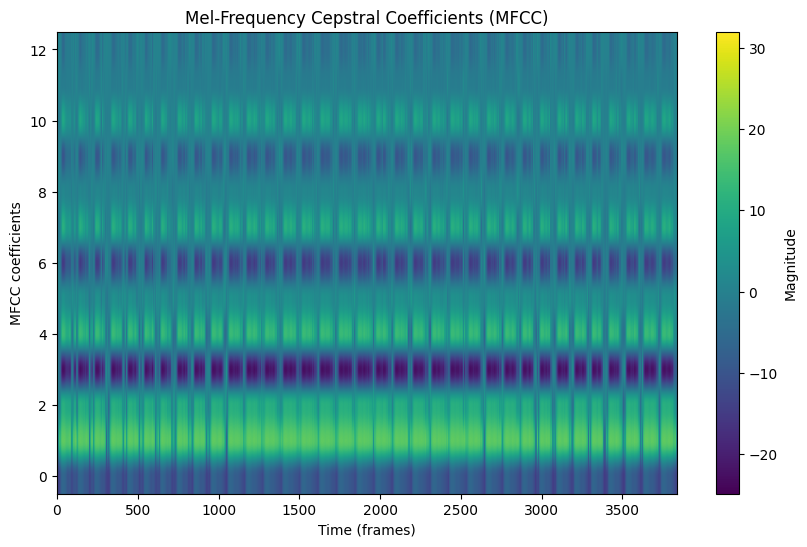

In [12]:
# Step 7: Compute Mel-Frequency Cepstral Coefficients (MFCC)
def apply_mfcc(window):
    return mfcc(window["values"].values, samplerate=128)


mfccs = [apply_mfcc(window) for window in windows]

# Visualize MFCC
plt.figure(figsize=(10, 6))
plt.imshow(mfccs[int(len(mfccs)/2)].T, aspect="auto", cmap="viridis", origin="lower")
plt.colorbar(label="Magnitude")
plt.xlabel("Time (frames)")
plt.ylabel("MFCC coefficients")
plt.title("Mel-Frequency Cepstral Coefficients (MFCC)")
plt.show()

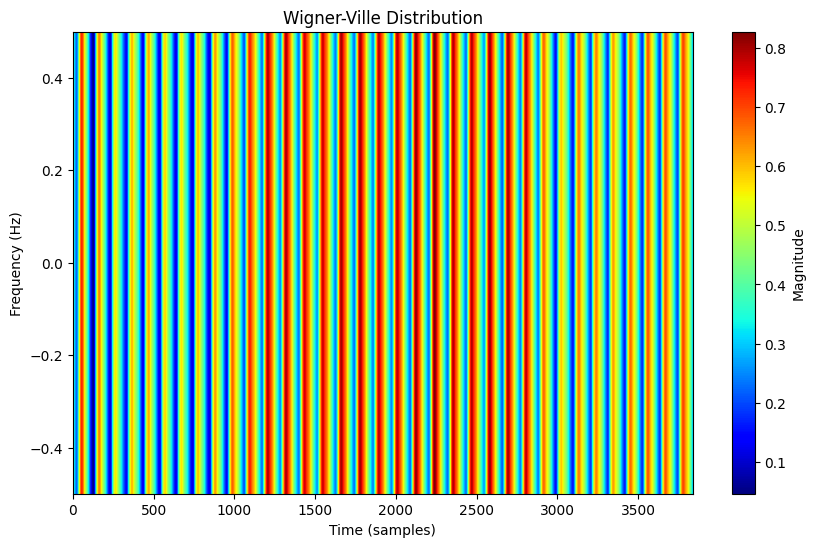

In [21]:
# Compute the Wigner-Ville distribution
def compute_wvd(signal, fs):
    wvd = wiener(signal)
    return np.abs(wvd)

# Apply the Wigner-Ville distribution to each window
wvds = [compute_wvd(window["values"].values, fs=128) for window in windows]

# Visualize the Wigner-Ville distribution
plt.figure(figsize=(10, 6))
plt.imshow(wvds[int(len(wvds)/2)][np.newaxis, :], aspect="auto", cmap="jet", origin="lower")
plt.colorbar(label="Magnitude")
plt.xlabel("Time (samples)")
plt.ylabel("Frequency (Hz)")
plt.title("Wigner-Ville Distribution")
plt.show()

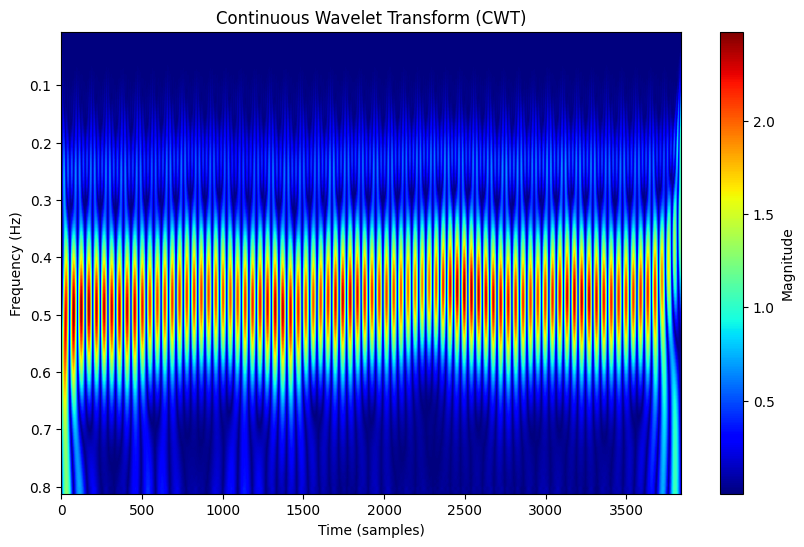

In [28]:
# Compute the Continuous Wavelet Transform (CWT)
def compute_cwt(signal):
    scales = np.arange(1, 128)  # Adjust the range of scales as needed
    wavelet = "morl"  # Morlet wavelet is commonly used for CWT
    coefs, freqs = pywt.cwt(signal, scales, wavelet)
    return coefs, freqs


# Apply the CWT to each window
cwt_results = [compute_cwt(window["values"].values) for window in windows]

# Visualize the CWT
for coefs, freqs in [cwt_results[0]]:
    plt.figure(figsize=(10, 6))
    plt.imshow(
        np.abs(coefs),
        extent=[0, len(coefs[0]), freqs[0], freqs[-1]],
        cmap="jet",
        aspect="auto",
    )
    plt.colorbar(label="Magnitude")
    plt.xlabel("Time (samples)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Continuous Wavelet Transform (CWT)")
    plt.show()